In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
m = 50
x = 2 * np.random.rand(m, 1)
y = (4 + 3 * x + np.random.randn(m, 1)).ravel()

<function matplotlib.pyplot.show(close=None, block=None)>

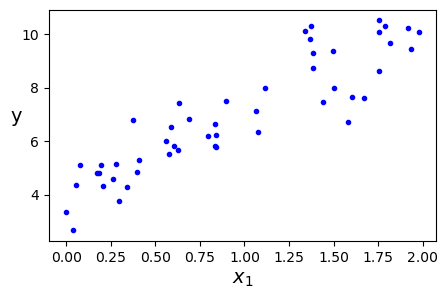

In [3]:
plt.figure(figsize=(5, 3))
plt.plot(x, y, 'bo', markersize=3)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('y', fontsize=14, rotation=0)
plt.show

In [5]:
#使用LinearSVR()

from sklearn.svm import LinearSVR

svmReg = LinearSVR(epsilon=0.5, random_state=1, dual='auto')    #由於版本更新，需加上dual='auto'來避免錯誤
svmReg.fit(x, y)
svmReg.intercept_, svmReg.coef_

(array([3.82895689]), array([3.18608831]))

In [6]:
svmReg.score(x, y)

0.813787675910222

In [12]:
def findSupportVectors(svmReg, x, y, epsilon):
    yPred = svmReg.predict(x)
    offMargin = (np.abs(y-yPred) >= epsilon)
    return np.argwhere(offMargin)

In [15]:
def plotSvmRegression(model, x, y, epsilon, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100,1)
    yPred = model.predict(x1s)
    
    plt.plot(x1s, yPred, 'r-', linewidth=2, label='$\hat{y}$')
    plt.plot(x1s, yPred + epsilon, 'k--')
    plt.plot(x1s, yPred - epsilon, 'k--')
    
    model.support_ = findSupportVectors(model, x, y, epsilon)
    plt.scatter(x[model.support_], y[model.support_], c='red', s=50, alpha=.3)
    
    plt.plot(x, y, 'bo', markersize=3)
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('y', fontsize=14, rotation=0)
    plt.legend(loc='lower right')

<function matplotlib.pyplot.show(close=None, block=None)>

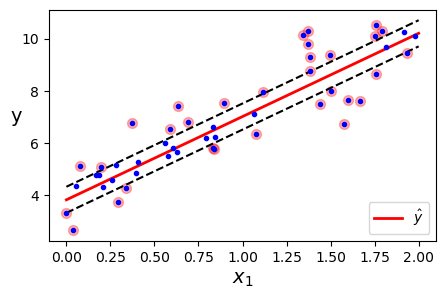

In [16]:
plt.figure(figsize=(5, 3))
plotSvmRegression(svmReg, x, y, 0.5, [0, 2, 3, 11])
plt.show

In [17]:
#使用SGDRegressor()

from sklearn.linear_model import SGDRegressor

sgdReg = SGDRegressor(loss='epsilon_insensitive', epsilon=.5, random_state=1)

sgdReg.fit(x, y)
sgdReg.intercept_, sgdReg.coef_

(array([3.70372653]), array([3.36479139]))

In [18]:
sgdReg.score(x, y)

0.8115955618208129

<function matplotlib.pyplot.show(close=None, block=None)>

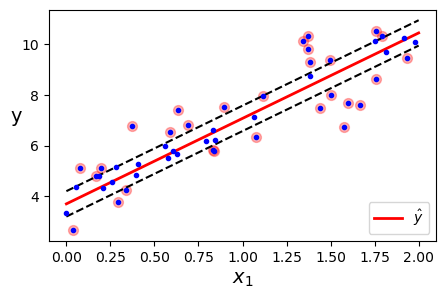

In [19]:
plt.figure(figsize=(5, 3))
plotSvmRegression(sgdReg, x, y, .5, [0, 2, 3, 11])
plt.show

In [20]:
#使用SVR(kernel='linear')

from sklearn.svm import SVR

svrReg = SVR(kernel='linear', epsilon=.5)
svrReg.fit(x, y)
svrReg.intercept_, svrReg.coef_

(array([4.21115491]), array([[2.91591784]]))

In [21]:
svrReg.score(x, y)

0.8134889655563093

<function matplotlib.pyplot.show(close=None, block=None)>

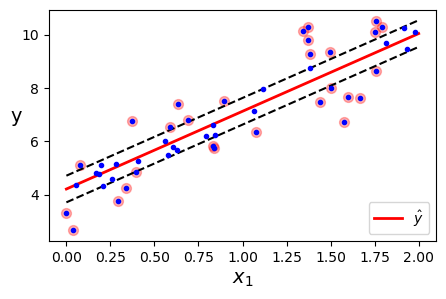

In [22]:
plt.figure(figsize=[5, 3])
plotSvmRegression(svrReg, x, y, .5, [0 ,2, 3, 11])
plt.show

In [26]:
np.random.seed(1)
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x ** 2 + np.random.randn(m, 1) / 10).ravel()

<function matplotlib.pyplot.show(close=None, block=None)>

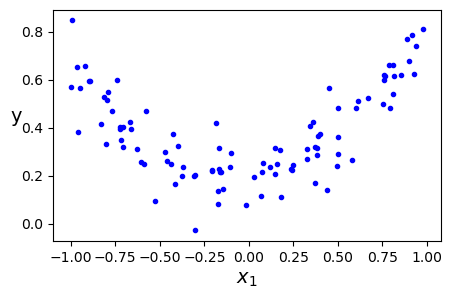

In [27]:
plt.figure(figsize=(5, 3))
plt.plot(x, y, 'bo', markersize=3)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('y', fontsize=14, rotation=0)
plt.show

In [32]:
#使用LinearSVR()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

polySvmReg = Pipeline([
    ('ployFeatures', PolynomialFeatures(degree=2, include_bias=False)),
    ('scl', StandardScaler()),
    ('polySvm', LinearSVR(max_iter=10000, epsilon=.1, random_state=1, dual='auto'))
])

In [33]:
polySvmReg.fit(x, y)
polySvmReg['polySvm'].intercept_, polySvmReg['polySvm'].coef_

(array([0.37849953]), array([0.03567448, 0.16274833]))

In [34]:
polySvmReg.score(x, y)

0.7690321422676615

<function matplotlib.pyplot.show(close=None, block=None)>

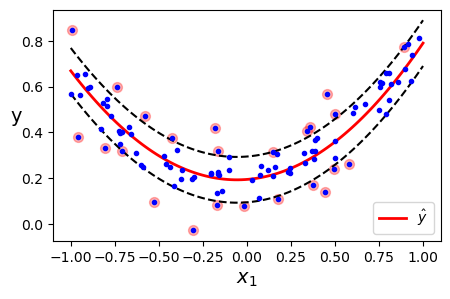

In [36]:
plt.figure(figsize=(5, 3))
plotSvmRegression(polySvmReg, x, y, .1, [-1, 1, 0, 1])
plt.show

In [38]:
#使用SGDRegressor(loss='epsilon_insensitive')

polySgdReg = Pipeline([
    ('polyFeatures', PolynomialFeatures(degree=2, include_bias=False)),
    ('scl', StandardScaler()),
    ('polySgd', SGDRegressor(loss='epsilon_insensitive', epsilon=.1 ,random_state=1))
])

polySgdReg.fit(x, y)
polySgdReg['polySgd'].intercept_, polySgdReg['polySgd'].coef_

(array([0.37549958]), array([0.04139847, 0.15873503]))

In [40]:
polySgdReg.score(x, y)

0.7724751759150993

<function matplotlib.pyplot.show(close=None, block=None)>

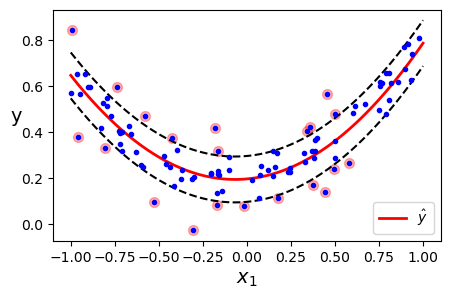

In [43]:
plt.figure(figsize=(5, 3))
plotSvmRegression(polySgdReg, x, y, .1, [-1, 1, 0, 1])
plt.show

In [44]:
#使用SVR(kernel='poly')

polySvrReg = SVR(kernel='poly', degree=2, epsilon=.1, gamma=1)

polySvrReg.fit(x, y)

SVR(degree=2, gamma=1, kernel='poly')

In [45]:
polySvrReg.score(x, y)

0.7019128605564215

<function matplotlib.pyplot.show(close=None, block=None)>

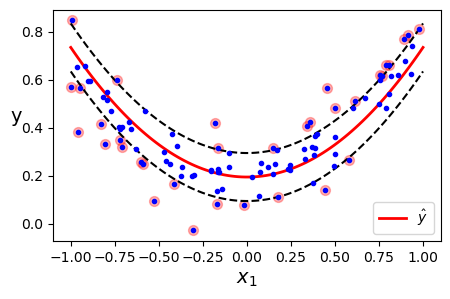

In [46]:
plt.figure(figsize=(5, 3))
plotSvmRegression(polySvrReg, x, y, .1, [-1, 1, 0, 1])
plt.show

In [47]:
#使用SVR(kernel='rbf')

rbfSvrReg = SVR(kernel='rbf', degree=2, epsilon=.1, gamma=1)
rbfSvrReg.fit(x, y)

SVR(degree=2, gamma=1)

In [48]:
rbfSvrReg.score(x, y)

0.7645639795714291

<function matplotlib.pyplot.show(close=None, block=None)>

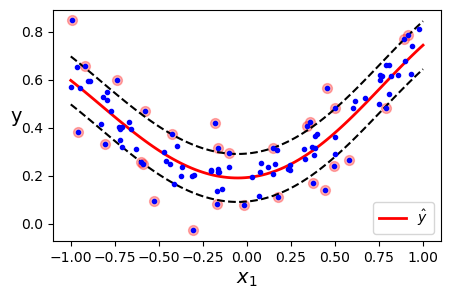

In [49]:
plt.figure(figsize=(5, 3))
plotSvmRegression(rbfSvrReg, x, y, .1,[-1, 1, 0, 1])
plt.show